In [ ]:
# Create accuracy table
import pandas as pd
import os
import json
from measures.utils import *
from measures.measures import *
from datasets_folder.dataset import DatasetIMDB2, DatasetNLI2, Reuters

def generate_table_acc(path, n_initializations=30):
    n_ini = n_initializations-1
    dirs = []
    for file in os.listdir(path):
        d = os.path.join(path, file)
        if os.path.isdir(d):
            dirs.append(file)

    thres = ["0","20","50","70","90","99"]
    
    dic_to_conv = {"dataset":[],"model":[],"pruning algo":[],"threshold":[],"accuracy/f1":[], "0":[], "20":[], "50":[],"70":[], "90":[],"99":[]}


    for exp in dirs:
        if "orig" not in exp and os.path.isfile(path+"/"+exp+"/"+str(n_ini)+"_measures.json"):

            for i in range(n_initializations):
                f = open(path+"/"+exp+"/"+str(i)+"_measures.json")
                
                data = json.load(f)

                dic_name = exp.split("_")

                algo = dic_name[3]
                if dic_name[-2]=="ini":
                    algo+="_ini"

                dic_to_conv["dataset"].append(dic_name[0])
                dic_to_conv["model"].append(dic_name[2])
                dic_to_conv["pruning algo"].append(algo)
                dic_to_conv["threshold"].append(dic_name[-1])

                for t in thres:
                    dic_to_conv[t].append(None)

                if dic_name[0]=="Reuters" or dic_name[0]=="AAPD":
                    dic_to_conv["accuracy/f1"].append(float(data["f1"]["macro"][1][-1]))
                    dic_to_conv[dic_name[-1]][-1]=float(data["f1"]["macro"][1][-1])
                else:
                    dic_to_conv["accuracy/f1"].append(float(data["accuracy"][1][-1]))
                    dic_to_conv[dic_name[-1]][-1]=float(data["accuracy"][1][-1])
                f.close()

    
    return dic_to_conv

dir=generate_table_acc("./results/")

print(dir)
df = pd.DataFrame.from_dict(dir)


In [ ]:
# Create accuracy table
import pandas as pd
import os
import json
from measures.utils import *
from measures.measures import *
from datasets_folder.dataset import DatasetIMDB2, DatasetNLI2, Reuters

def generate_table_acc(path, n_initializations=30):
    n_ini = n_initializations-1
    dirs = []
    for file in os.listdir(path):
        d = os.path.join(path, file)
        if os.path.isdir(d):
            dirs.append(file)

    thres = ["0","20","50","70","90","99"]
    
    dic_to_conv = {"dataset":[],"model":[],"pruning algo":[],"threshold":[],"accuracy/f1":[], "0":[], "20":[], "50":[],"70":[], "90":[],"99":[]}


    for exp in dirs:
        if "orig" not in exp and os.path.isfile(path+"/"+exp+"/"+str(n_ini)+"_measures.json"):

            for i in range(n_initializations):
                f = open(path+"/"+exp+"/"+str(i)+"_measures.json")
                
                data = json.load(f)

                dic_name = exp.split("_")

                algo = dic_name[3]
                if dic_name[-2]=="ini":
                    algo+="_ini"

                dic_to_conv["dataset"].append(dic_name[0])
                dic_to_conv["model"].append(dic_name[2])
                dic_to_conv["pruning algo"].append(algo)
                dic_to_conv["threshold"].append(dic_name[-1])

                for t in thres:
                    dic_to_conv[t].append(None)

                if dic_name[0]=="Reuters" or dic_name[0]=="AAPD":
                    dic_to_conv["accuracy/f1"].append(float(data["loss"][0][-1])-float(data["loss"][1][-1]))
                    dic_to_conv[dic_name[-1]][-1]=float(data["loss"][0][-1])-float(data["loss"][1][-1])
                else:
                    dic_to_conv["accuracy/f1"].append(float(data["loss"][0][-1])-float(data["loss"][1][-1]))
                    dic_to_conv[dic_name[-1]][-1]=float(data["loss"][0][-1])-float(data["loss"][1][-1])
                f.close()

    
    return dic_to_conv

dir=generate_table_acc("./results/")

print(dir)
df = pd.DataFrame.from_dict(dir)


In [74]:
import pandas as pd
path_csv = './Images/tables/anal1_gp.csv'

In [1]:
import pandas as pd
path_csv = './Images/tables/anal1.csv'

In [ ]:

df.to_csv(path_csv, index=False)
df = pd.read_csv(path_csv)

In [16]:
df = df[df["pruning algo"] != "random-WRs"]

In [3]:
df = pd.read_csv(path_csv)

In [ ]:

import numpy as np
df = pd.read_csv(path_csv)
df = df[df["pruning algo"] != "random-WRs"]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df2 = df.groupby(['dataset',"model","pruning algo"]).agg({'0':['mean','std'], '20':['mean','std'],
                                                          '50':['mean','std'], '70':['mean','std'],
                                                          '90':['mean','std'], '99':['mean','std'],
                                                         'accuracy/f1':['mean','std']})
df2 = df2.reset_index()
tmp_dic = df2.to_dict()

tmp_res = {}
for i in range(len(tmp_dic[('pruning algo', '')])):
    if tmp_dic[('pruning algo', '')][i] == "NoPruning":
        tmp_res[(tmp_dic[('dataset', '')][i], tmp_dic[('model', '')][i], "mean")]=tmp_dic[('0',"mean")][i]
        tmp_res[(tmp_dic[('dataset', '')][i], tmp_dic[('model', '')][i], "std")]=tmp_dic[('0',"std")][i]

print(tmp_res)

for i in range(len(tmp_dic[('pruning algo', '')])):
    tmp_dic[('0',"mean")][i] = round(tmp_res[(tmp_dic[('dataset', '')][i], tmp_dic[('model', '')][i], "mean")],3)
    tmp_dic[('0',"std")][i] = round(tmp_res[(tmp_dic[('dataset', '')][i], tmp_dic[('model', '')][i], "std")],3)

    for j in ['20','50','70','90','99']:
        tmp_dic[(j,"mean")][i] = round(tmp_dic[(j,"mean")][i],3)
        tmp_dic[(j,"std")][i] = round(tmp_dic[(j,"std")][i],3)


df2 = pd.DataFrame.from_dict(tmp_dic)

df_multiclass = df2[df2['dataset'] == "IMDB"]
df_multiclass2 = df2[df2['dataset'] == "SNLI"]
df_multiclass = pd.concat([df_multiclass, df_multiclass2])

df_multilabel = df2[df2['dataset'] == "Reuters"]
df_multilabel2 = df2[df2['dataset'] == "AAPD"]
df_multilabel = pd.concat([df_multilabel, df_multilabel2])


df_multilabel = df_multilabel.drop(df_multilabel[df_multilabel["pruning algo"] == "NoPruning"].index).drop(columns=['accuracy/f1'])
df_multilabel = df_multilabel.set_index(["dataset","model","pruning algo"])

df_multiclass = df_multiclass.drop(df_multiclass[df_multiclass["pruning algo"] == "NoPruning"].index).drop(columns=['accuracy/f1'])
df_multiclass = df_multiclass.set_index(["dataset","model","pruning algo"])


In [5]:
def ilog(n, base):
    count = 0
    while n >= base:
        count += 1
        n //= base
    return count

def sci_notation(n, prec=3):
    base = 10
    exponent = ilog(n, base)
    mantissa = n / base**exponent
    return '{0:.{1}f}e{2:+d}'.format(mantissa, prec, exponent)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors_m

import warnings
warnings.filterwarnings('ignore')

cmap = plt.cm.get_cmap('RdYlGn')

def highlight_max(x):
    tmp = []
    for value in x:
        tmp.append(float(value.split(" ")[0]))
    tmp = np.array(tmp)
    return np.where(tmp == np.nanmax(tmp), f"font-weight: bold;", None)

def get_color(v):
    return "border: solid thin; color:black; background-color:"+colors_m.rgb2hex(cmap(v*(0.8-0.2)+0.2))

def convert_names(df):
    return df.reset_index().replace({
    "IBP-WRs":"IIBP-WR",
    "IBPs":"IIBP",
    "IBPs_ini":"IBP-AI",

    "IMP-WRs":"IMP-WR",
    "IMPs":"IMP",
    "IMPs_ini":"MP-AI",

    "randoms":"IRP",
    "randoms_ini":"RP-AI"
    }).set_index(["dataset","model","pruning algo"])

def three_decimals(x):
    return '{0:.3f}'.format(x)

def color_df(ori):
    ori = convert_names(ori)
    df = ori.copy()
    df_colors = df.copy()

    for t in ['0', '20','50','70','90','99']:
        df_colors=df_colors.drop([t], axis=1)
        df_colors[t] = df[t]["mean"]

        df[t+"."] = df[t]["mean"].apply(three_decimals).astype(str) + " (" + df[t]["std"].apply(three_decimals).astype(str) + ")"
        df = df.drop([t], axis=1)
        df = df.rename(columns={t+".":t})

    df = df[df.columns.drop(list(df.filter(regex='std')))]
    
    styler = df.style.apply(lambda x: df_colors.applymap(get_color), axis=None)

    idx = pd.IndexSlice

    dif_seg = df.index.levels[0]

    dif_seg2 = df.index.levels[1]

    for seg in dif_seg:
        for seg2 in dif_seg2:
            sliced = idx[seg,seg2,:] 
            styler = styler.apply(highlight_max, axis=0, subset=sliced)
    return styler

In [7]:
minv = -0.2
maxv = 0
def rescale(v):
    return (v - minv)/(maxv- minv)
resc = rescale

def get_color(v):
    c = resc(v)
    return "border: solid thin; color:black; background-color:"+colors_m.rgb2hex(cmap(c))


In [ ]:
style = color_df(df_multilabel)
style

In [ ]:
style = color_df(df_multilabel)
style

{('0', 'mean'): {('Reuters', 'BERT', 'IBP-WRs'): 0.836, ('Reuters', 'BERT', 'IBPs'): 0.836, ('Reuters', 'BERT', 'IBPs_ini'): 0.836, ('Reuters', 'BERT', 'IMP-WRs'): 0.836, ('Reuters', 'BERT', 'IMPs'): 0.836, ('Reuters', 'BERT', 'IMPs_ini'): 0.836, ('Reuters', 'BERT', 'randoms'): 0.836, ('Reuters', 'BERT', 'randoms_ini'): 0.836, ('Reuters', 'BiLSTM', 'IBP-WRs'): 0.731, ('Reuters', 'BiLSTM', 'IBPs'): 0.731, ('Reuters', 'BiLSTM', 'IBPs_ini'): 0.731, ('Reuters', 'BiLSTM', 'IMP-WRs'): 0.731, ('Reuters', 'BiLSTM', 'IMPs'): 0.731, ('Reuters', 'BiLSTM', 'IMPs_ini'): 0.731, ('Reuters', 'BiLSTM', 'randoms'): 0.731, ('Reuters', 'BiLSTM', 'randoms_ini'): 0.731, ('AAPD', 'BERT', 'IBP-WRs'): 0.578, ('AAPD', 'BERT', 'IBPs'): 0.578, ('AAPD', 'BERT', 'IBPs_ini'): 0.578, ('AAPD', 'BERT', 'IMP-WRs'): 0.578, ('AAPD', 'BERT', 'IMPs'): 0.578, ('AAPD', 'BERT', 'IMPs_ini'): 0.578, ('AAPD', 'BERT', 'randoms'): 0.578, ('AAPD', 'BERT', 'randoms_ini'): 0.578, ('AAPD', 'BiLSTM', 'IBP-WRs'): 0.468, ('AAPD', 'BiLSTM'

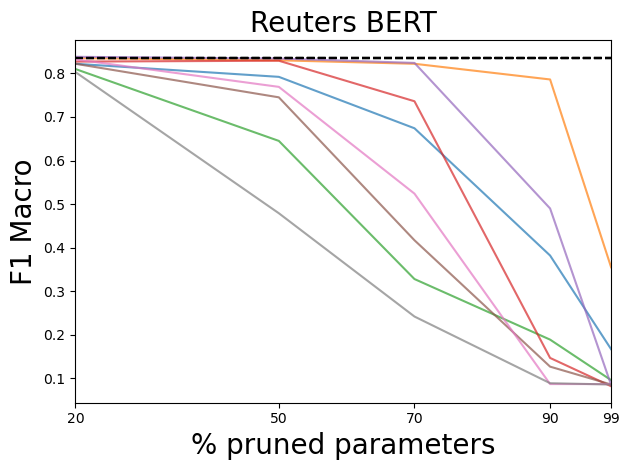

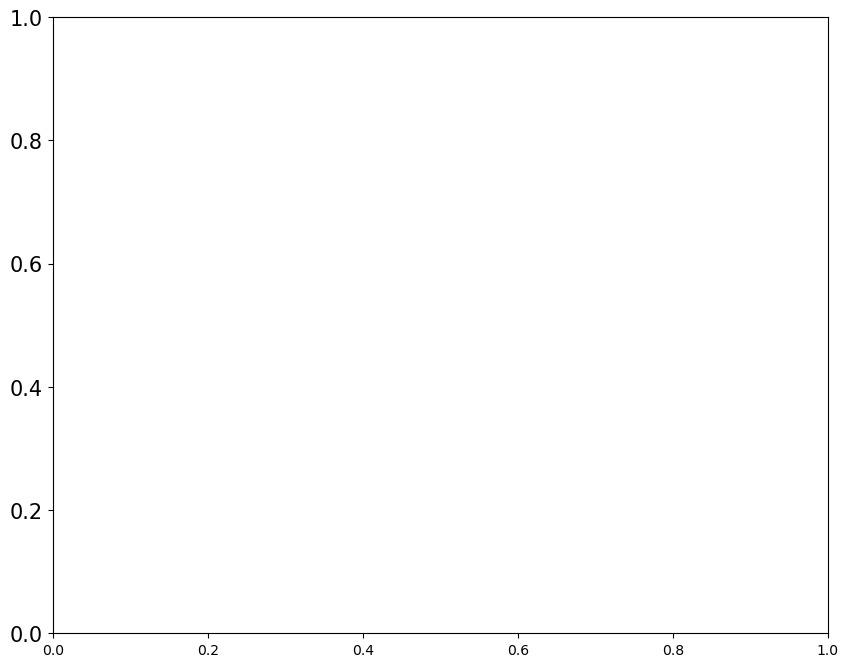

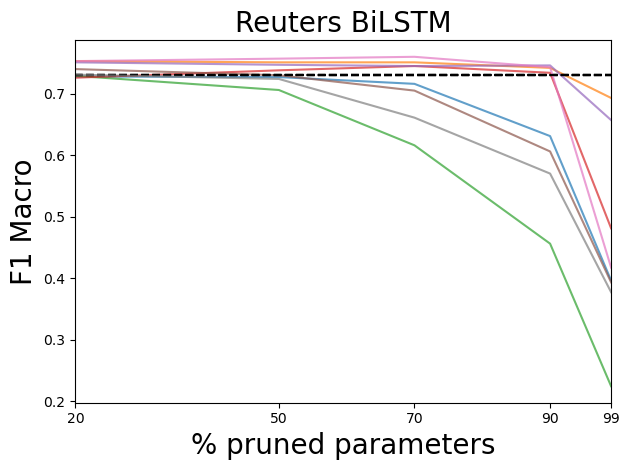

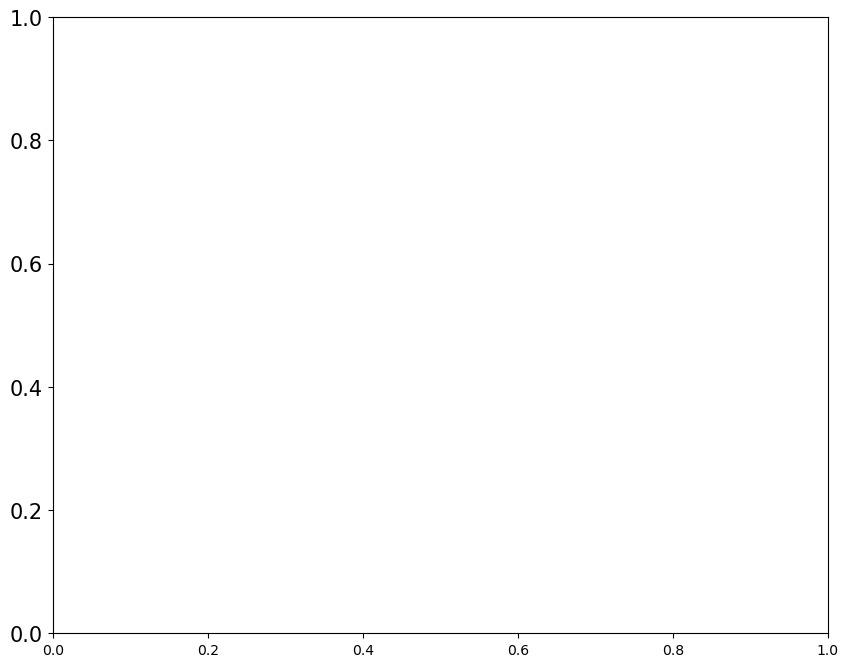

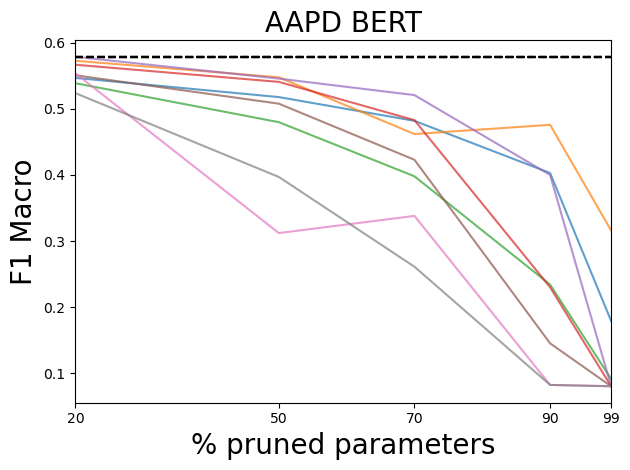

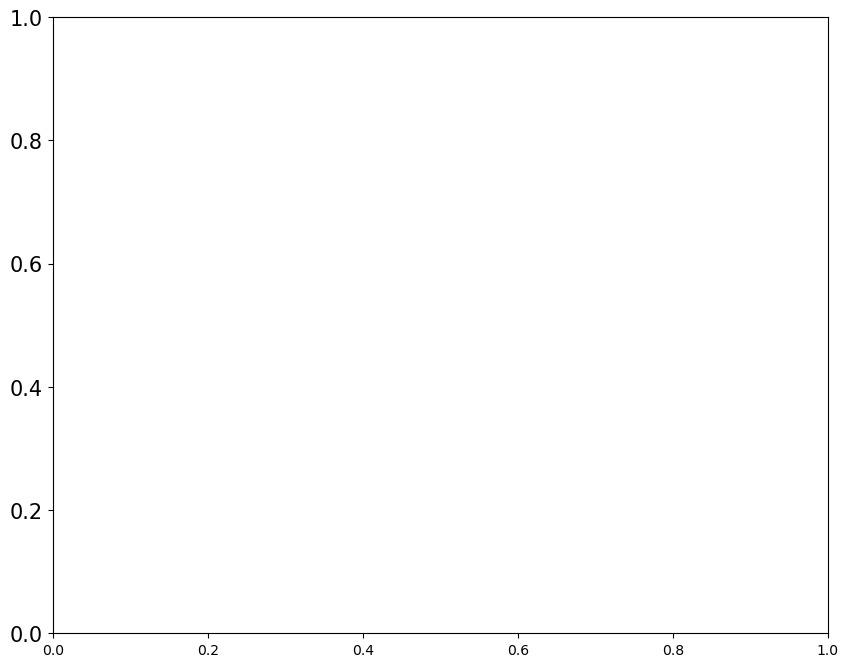

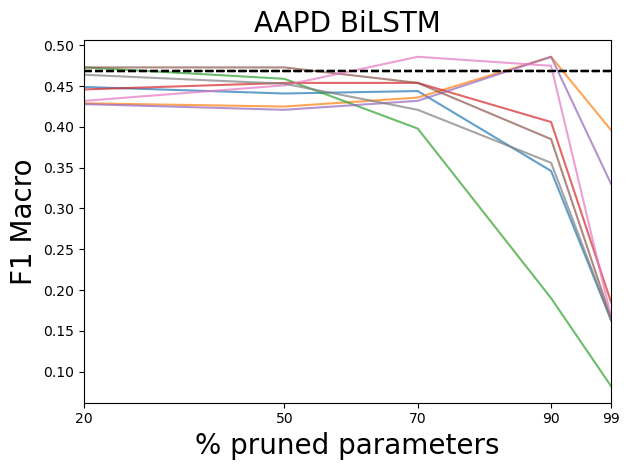

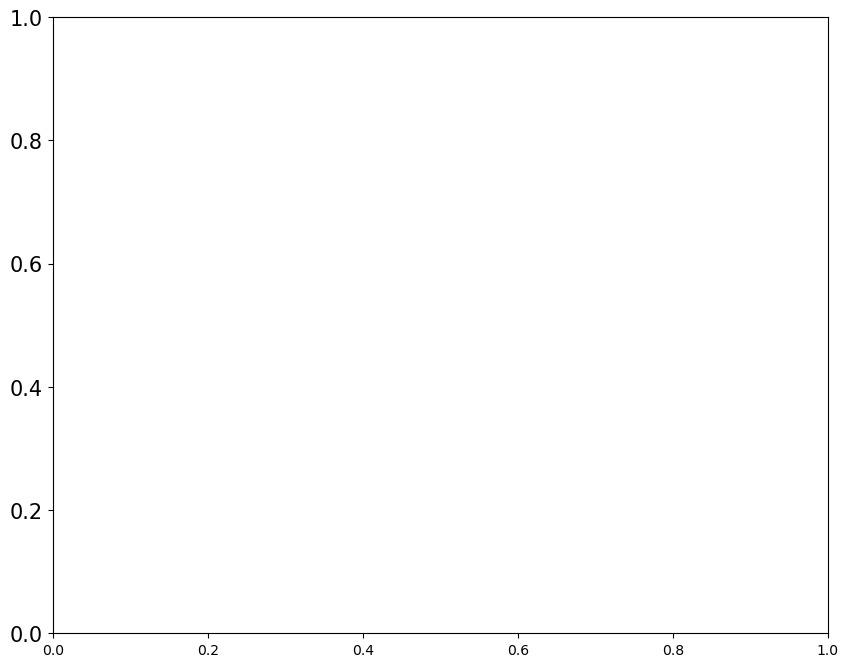

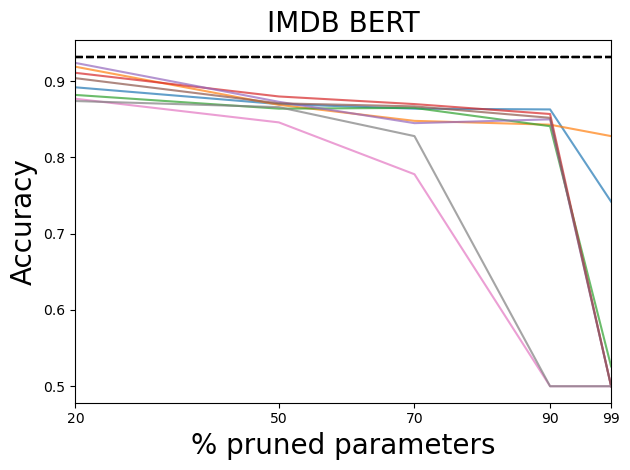

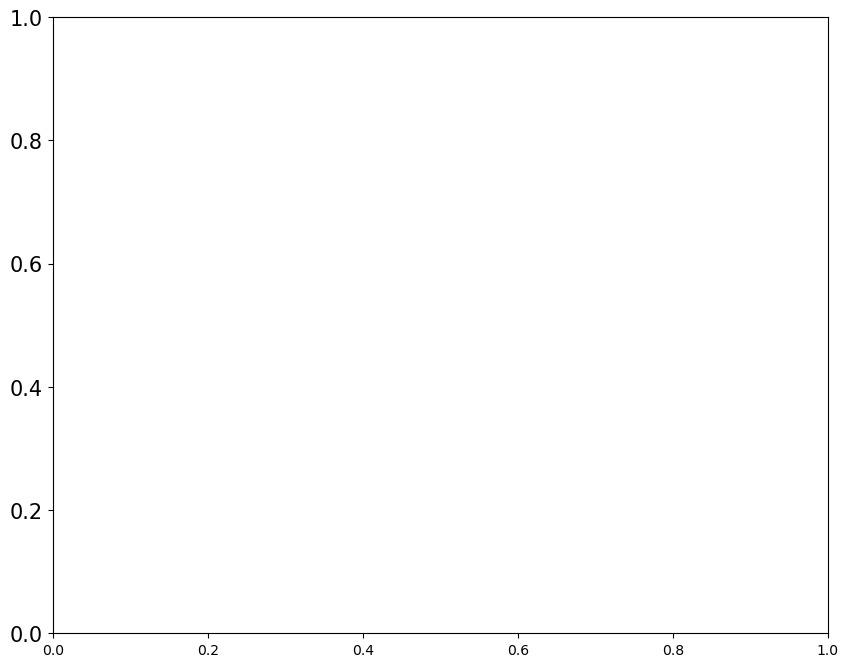

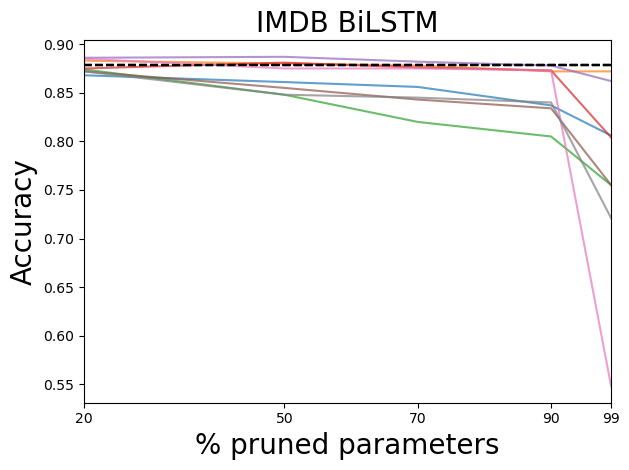

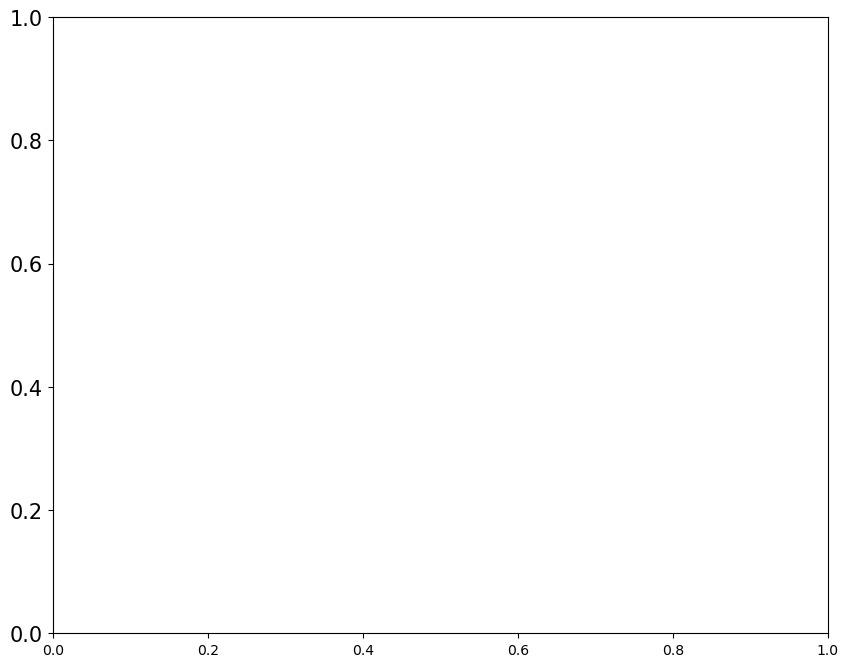

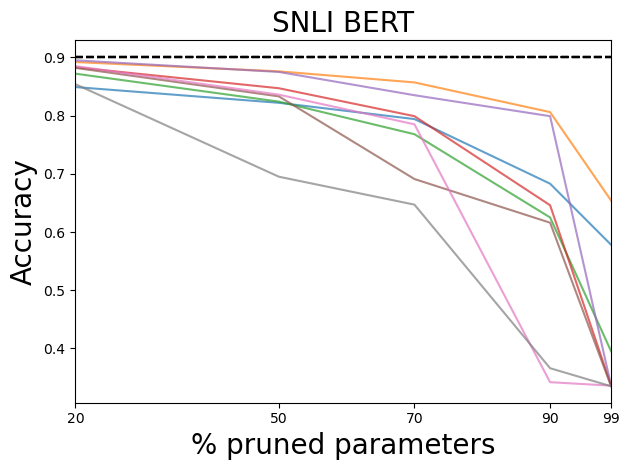

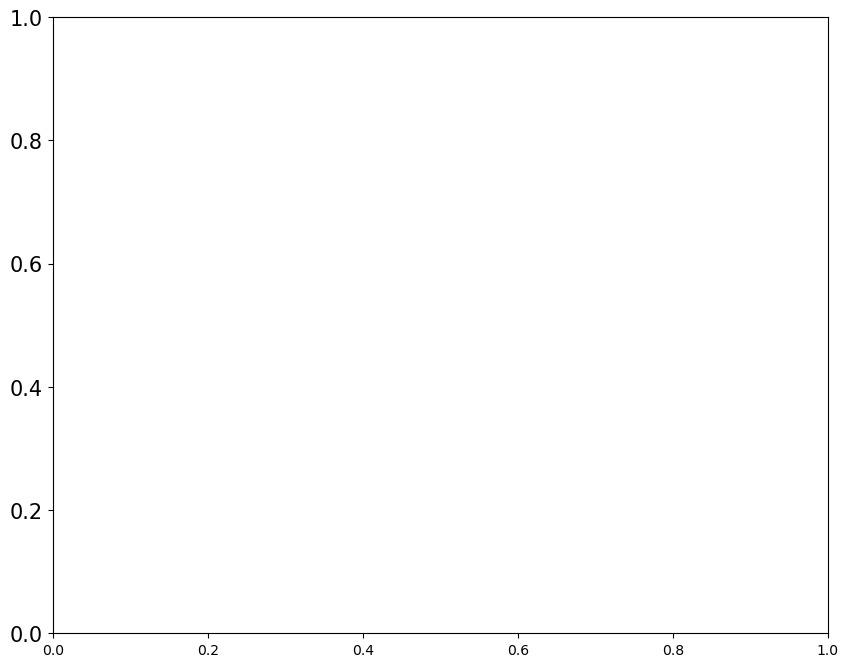

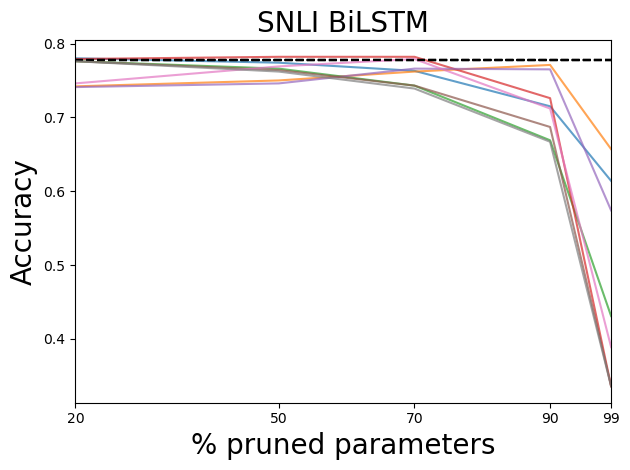

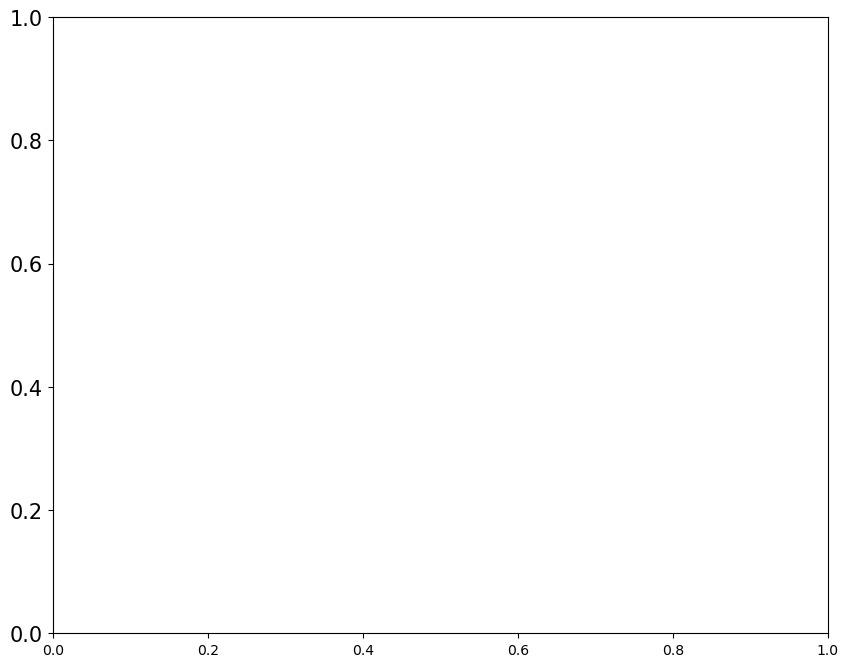

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json

def produce_graphs(multilabel=True):
    datasets = ["IMDB","SNLI"]
    if multilabel:
        datasets = ["Reuters", "AAPD"]

    architectures = ["BERT","BiLSTM"]

    algorithms=["IBP-WRs", "IBPs","IBPs_ini", "IMP-WRs", "IMPs", "IMPs_ini", "randoms","randoms_ini"]

    thresholds=["0","20","50","70","90","99"]
    thresholds_axe=[0,20,50,70,90,99]


    tmp_dic = {}
    if multilabel:
        tmp_dic = df_multilabel.to_dict()
    else:
        tmp_dic = df_multiclass.to_dict()

    width = 10
    height = 8

    print(tmp_dic)

    for dataset in datasets:
        for architecture in architectures:
            thresholds_axe_n=["0","20","50","70","90","99"]

            fig = plt.figure()
            ax = fig.add_subplot(111)


            plt.title(dataset+" "+architecture, fontsize=20)

            ax.set_xlabel('% pruned parameters')
            ax.xaxis.label.set_size(20)
            if multilabel:
                ax.set_ylabel('F1 Macro')
            else:
                ax.set_ylabel('Accuracy')
            ax.yaxis.label.set_size(20)
            
            plt.figure(figsize=(width, height))


            for algo in algorithms:
                acc_algo = []
                for threshold in thresholds:
                    if (dataset, architecture, algo) in tmp_dic[(threshold, 'mean')]:
                        acc_algo.append(tmp_dic[(threshold, 'mean')][(dataset, architecture, algo)])
                    if threshold=="0":
                        tmp_val = tmp_dic[(threshold, 'mean')][(dataset, architecture, algo)]
                        ax.plot(thresholds_axe[1:], [tmp_val for _ in range(5)], "--", color="black")
                
                acc_algo = np.array(acc_algo)

                if len(thresholds_axe) == len(acc_algo):

                    ax.plot(thresholds_axe[1:], acc_algo[1:], alpha=0.7, ms=3) 

            ax.set_xlim(20, 99)
            plt.yticks(fontsize=15)

            ax.set_xticks(thresholds_axe[1:])
            ax.set_xticklabels(thresholds_axe_n[1:])

            fig.tight_layout()            
            fig.savefig('Images/'+dataset+" "+architecture+'.pdf', dpi=400, transparent=True)
                            
produce_graphs()
produce_graphs(False)

